# EPOCH 
### The cycle running for backward and forward propagation is called EPOCH 

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('cust_satisfaction.csv')

In [37]:
df.head(10)

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,26,1180,1,4,1,0,0.0
6,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,47,1276,2,4,2,9,23.0
7,Female,Loyal Customer,Business travel,Business,satisfied,52,2035,5,5,4,4,0.0
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,41,853,1,1,2,0,0.0
9,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied,20,1061,2,4,2,0,0.0


In [38]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})


In [39]:
df['Customer Type']=df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})



In [40]:
df['Type of Travel']=df['Type of Travel'].map({'Business travel':1,'Personal Travel':0})

In [41]:
df['Class']=df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})

In [42]:
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [43]:
df.head(10)

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0
5,0,1,0,2,0,26,1180,1,4,1,0,0.0
6,1,1,0,2,0,47,1276,2,4,2,9,23.0
7,0,1,1,1,1,52,2035,5,5,4,4,0.0
8,0,1,1,1,0,41,853,1,1,2,0,0.0
9,1,0,1,2,0,20,1061,2,4,2,0,0.0


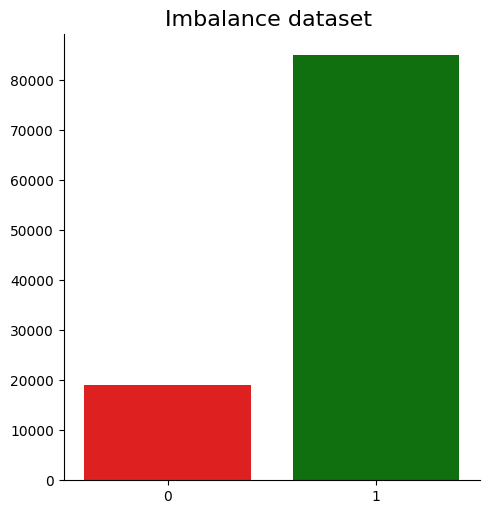

In [44]:
index=list((df['Customer Type'].value_counts().values))
label=list((df['Customer Type'].value_counts().keys()))
color = ['red','green']
sb.catplot(x=label,y=index,kind='bar',palette=color)
plt.title("Imbalance dataset ",fontsize=16)
plt.show()

In [45]:
loyal_customer=df[df['Customer Type']==1].loc[0:20000]
disloyal_customer=df[df['Customer Type']==0]

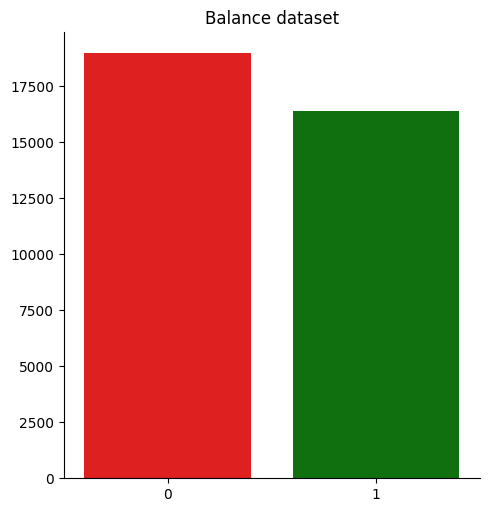

In [46]:
balance_df=pd.concat([loyal_customer,disloyal_customer])
colors=['red','green']
sb.catplot(x=list(balance_df['Customer Type'].value_counts().keys()),
y=list(balance_df['Customer Type'].value_counts().values),kind='bar',palette=colors)
plt.title('Balance dataset')
plt.show()


In [47]:
balance_df.isnull().sum()

Gender                         0
Customer Type                  0
Type of Travel                 0
Class                          0
satisfaction                   0
Age                            0
Flight Distance                0
Inflight entertainment         0
Baggage handling               0
Cleanliness                    0
Departure Delay in Minutes     0
Arrival Delay in Minutes      94
dtype: int64

In [48]:
balance_df.dropna(inplace=True)

In [49]:
balance_df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [50]:
x=balance_df.drop('Customer Type',axis=1)
y=balance_df[['Customer Type']]

In [51]:
print(x.shape,y.shape)

(35269, 11) (35269, 1)


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("x train shape ",x_train.shape,"y train shape,",x_test.shape)
print(y_train.shape,y_test.shape)

x train shape  (28215, 11) y train shape, (7054, 11)
(28215, 1) (7054, 1)


In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [54]:
x_train_scaled=std.fit_transform(x_train)

In [55]:
x_test_scaled=std.transform(x_test)

# Libraries for ANN

In [56]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential,load_model

In [57]:
x_train.shape    , y_train.shape    # shape of the dataset

((28215, 11), (28215, 1))

In [58]:
x_train_scaled.shape[1]

11

In [59]:
Ann_model=Sequential()

# hidden layers
Ann_model.add(Dense(units=68,activation='relu',input_dim=x_train_scaled.shape[1]))
# Ann_model.add =  to add layers 
# units are nothing but N No. of Nodes 
# activation is activation function like sigmoid and relu
# input_dim is your input(features/colums )
Ann_model.add(Dense(units=32,activation='relu'))
Ann_model.add(Dense(units=24,activation='relu'))
Ann_model.add(Dense(units=12,activation='relu'))

# output layer
Ann_model.add(Dense(units=1,activation='sigmoid'))
# here unit is 1 cause we want single output on the basis of problem so we require one node 

# Compiling the models 
Ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# once the model predict the value and error occur the to overcome that issue we use back propagation 
# for back propagation we use .compile in which we give adam optimizer ,binary cross entropy 
Ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 68)             │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history=Ann_model.fit(x_train_scaled,y_train,epochs=15,validation_data=(x_test_scaled,y_test))

Epoch 1/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8082 - loss: 0.3918 - val_accuracy: 0.9069 - val_loss: 0.2409
Epoch 2/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9080 - loss: 0.2386 - val_accuracy: 0.9073 - val_loss: 0.2255
Epoch 3/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9175 - loss: 0.2162 - val_accuracy: 0.9139 - val_loss: 0.2161
Epoch 4/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9159 - loss: 0.2194 - val_accuracy: 0.9176 - val_loss: 0.2085
Epoch 5/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9189 - loss: 0.2108 - val_accuracy: 0.9199 - val_loss: 0.2041
Epoch 6/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9242 - loss: 0.2022 - val_accuracy: 0.9122 - val_loss: 0.2215
Epoch 7/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9255 - loss: 0.1981 - val_accuracy: 0.9237 - val_loss: 0.2037
Epoch 8/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9248 - loss: 0.1995 - val_accuracy: 0.

In [61]:
history=Ann_model.fit(x_train_scaled,y_train,initial_epoch=15,epochs=50,validation_data=(x_test_scaled,y_test))

Epoch 16/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9309 - loss: 0.1840 - val_accuracy: 0.9246 - val_loss: 0.1938
Epoch 17/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9331 - loss: 0.1782 - val_accuracy: 0.9236 - val_loss: 0.1932
Epoch 18/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9341 - loss: 0.1786 - val_accuracy: 0.9249 - val_loss: 0.1955
Epoch 19/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9325 - loss: 0.1799 - val_accuracy: 0.9244 - val_loss: 0.1897
Epoch 20/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9301 - loss: 0.1820 - val_accuracy: 0.9230 - val_loss: 0.1963
Epoch 21/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9326 - loss: 0.1800 - val_accuracy: 0.9283 - val_loss: 0.1914
Epoch 22/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9336 - loss: 0.1772 - val_accuracy: 0.9253 - val_loss: 0.1946
Epoch 23/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9333 - loss: 0.1756 - val_accu

In [62]:
import pandas as pd 
training_details=pd.DataFrame(history.history)
training_details

,accuracy,loss,val_accuracy,val_loss
0,0.930108,0.184933,0.924582,0.193845
1,0.931278,0.183699,0.923589,0.193232
2,0.931278,0.182180,0.924865,0.195530
3,0.931349,0.181463,0.924440,0.189702
4,0.931668,0.179423,0.923022,0.196263
5,0.932873,0.178614,0.928268,0.191424
6,0.932518,0.178785,0.925291,0.194554
7,0.932695,0.177796,0.925007,0.193279
8,0.932412,0.176279,0.926566,0.190206
9,0.932837,0.174961,0.927275,0.190546


<Axes: >

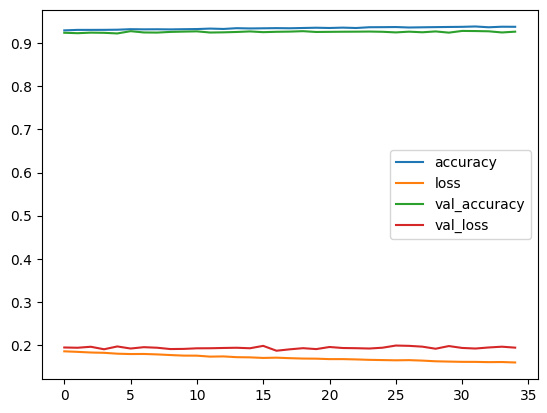

In [63]:
training_details.plot()

<Axes: >

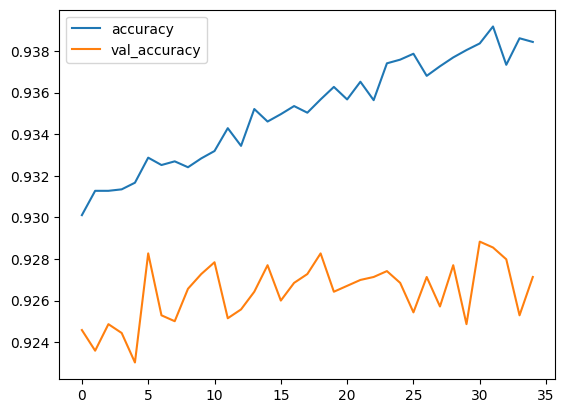

In [64]:
training_details[['accuracy','val_accuracy']].plot()

In [65]:
Ann_model.save('custom_satisfaction.h5')
Ann_model=load_model('custom_satisfaction.h5')

In [66]:
y_pred=Ann_model.predict(x_test_scaled)
prediction_label=(y_pred>0.5).astype('int').ravel()
prediction_label

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([0, 1, 1, ..., 1, 0, 0])

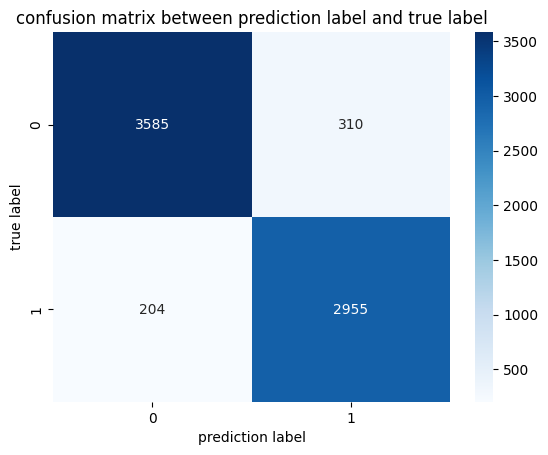

In [67]:
cm=confusion_matrix(prediction_label,y_test)
sb.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("prediction label")
plt.ylabel("true label")
plt.title("confusion matrix between prediction label and true label")
plt.show()

In [68]:
from sklearn.metrics import classification_report

print(classification_report(prediction_label,y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3895
           1       0.91      0.94      0.92      3159

    accuracy                           0.93      7054
   macro avg       0.93      0.93      0.93      7054
weighted avg       0.93      0.93      0.93      7054

